# Project: What makes a high rating movie?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report aims to analyze tmdb-movies data set (downloaded from kaggle) to explore the factors that are associated with the average rating of a movie.  Some of the variables that will be analyzed include director ( the no. of movies that a director has directed), popularity, adjusted revenue, adjusted budget, and released year.

In [89]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Procedures**: Load the data, check for duplicates and missing values, clean the data.

### General Properties

In [203]:
# Load Data Set
movie="/Users/Selina/Desktop/UdaCity/Movies/tmdb-movies.csv"
df=pd.read_csv(movie)
print(df.shape)
df.head(2)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [204]:
#Check basic structure of our data
df.info()
#We see that there are way to many null values in homepage and tagline
#since those two varaibles are not important to our analysis, we will drop them in the following section.
#After dropping those two columns, we'll drop all rows with missing values.
#Data types generally look fine, one problem we see is that release_date is an object. 
#I don't intend to use the release_date as an independent variable so let's leave it for now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [205]:
#Now we pull out a summary table for our data:
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [206]:
# Check for duplicates
df.duplicated().sum() #saw 1 duplicates
df.drop_duplicates(inplace=True) #dropped the duplicates
df.duplicated().sum() #check again, now we have zero duplicates

0

In [207]:
#Dropping tagline and homepage because they have too many null values and are irrelevant to our analysis
df.drop(['tagline','homepage'],axis=1,inplace=True)
#Drop rows that contain null values:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 19 columns):
id                      8664 non-null int64
imdb_id                 8664 non-null object
popularity              8664 non-null float64
budget                  8664 non-null int64
revenue                 8664 non-null int64
original_title          8664 non-null object
cast                    8664 non-null object
director                8664 non-null object
keywords                8664 non-null object
overview                8664 non-null object
runtime                 8664 non-null int64
genres                  8664 non-null object
production_companies    8664 non-null object
release_date            8664 non-null object
vote_count              8664 non-null int64
vote_average            8664 non-null float64
release_year            8664 non-null int64
budget_adj              8664 non-null float64
revenue_adj             8664 non-null float64
dtypes: float64(4), int64(6), object(9)

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1: 
### Does quantity lead to quality? 

Famous directors frequently direct new movies.Do those directors who direct higher amount of movies tend to be better, too? Do their movies tend to receive higher average ratings?  
**My hypothesis is that there exist a positive correlation between how many movies have a director directed and the mean rating he/she receives for his/her movies.**

In [213]:
#Let's count how many movies has each director directed in our dataset and store the result into 'vc'
vc=df['director'].value_counts()

In [214]:
#How many directors have directed more than 2 films in our dataset? 
print (vc[vc > 2].count())
#How many directors have directed more than 5 films in our dataset?
print (vc[vc > 5].count())
#How many directors have directed more than 10 films in our dataset? 
print (vc[vc > 10].count())

900
306
69


In [215]:
#Now, let's focus on examining the performance of the 85 directors who have directed more than 10 films.
name=vc[vc > 10].index.tolist()
count=vc[vc > 10].tolist()
director_count=list(zip(name,count))
director_count[0]

('Woody Allen', 40)

In [97]:
#We create a new dataframe that only includes directors who've directed more than 10 films.
df_10=df[df['director'].isin(name)]
#Check our new dataframe's shape:
df_10.shape #we see there's 1307 entries left in the df, which seems about right!

(1060, 19)

In [98]:
#Now let's create a new data frame that only contains director's name and his/her movies' mean rating:
ratings=df_10.groupby('director').mean()['vote_average']
dfratings=pd.DataFrame(ratings)

#Now we change director_count (a list with director's name and no. of movies he/she has directed) into a panda dataframe:
dfcount=pd.DataFrame(director_count, columns=['director','count'])

#Merge the two dataframes together to create a new df with director's name, mean voting of her/his movies, and no.movies
df_merge_director = pd.merge(dfratings, dfcount, left_on='director', right_on='director')
df_merge_director.head(2)

,director,vote_average,count
0,Alan Parker,6.658333,12
1,Barry Levinson,5.984211,19


Text(0, 0.5, 'Average ratings of movies')

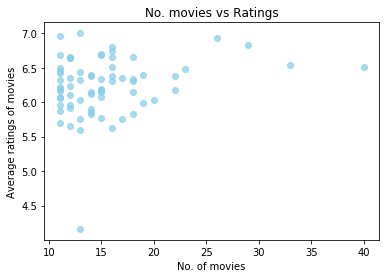

In [99]:
#Finally, let's visualize the data using a scatter plot
x=df_merge_director['count']
y=df_merge_director['vote_average']

plt.scatter(x, y, c='skyblue', alpha=0.7);
plt.title("No. movies vs Ratings")
plt.xlabel('No. of movies')
plt.ylabel('Average ratings of movies')
# We see there is a positive correlation! 

A positive correlation seems to exist between the no. of movies a director produce & the average rating of all of his/her movies. Intuitively, this makes sense because good directors tend to have more resources and more fundings so that he/she can produce more movies.

## Research Question 2:  
### Weighted Movie Rating and Its Relationship With Other Variables

In [100]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### What other variables correlate with the ratings of a movie?  
In this section, we will explore the relationship between ratings and other variables. My hypothesis is that **adjusted budget**, **adjusted revenue** and **popularity** both are positively correlated with movie ratings.  
But before we start to explore this question, we should think about the fairness of the current "vote_average" variable.

In [101]:
votecount=df['vote_count'].value_counts().sort_index()
print(votecount.head(1)) 
print(votecount.tail(1))
#1st column=how many votes/ratings did a movie receive and 2nd column=how many movies received that amount of votes

10    300
Name: vote_count, dtype: int64
9767    1
Name: vote_count, dtype: int64


We see that some movies only have 10 total no. of votes/ratings, whereas others have 9767 no.of votes/rating. It is therefore not fair to compare the average rating from 10 people with the average rating from 10000 people, because the smaller the no. of total votes, the larger the bias. In order to control for that, we need to come up with a weighted average rating system.  
Fortunately, IMDb does have such a weighted movie rating system:

#### IMDb weighted movie rating:

Weighted rating (𝑊𝑅)=(𝑣/(𝑣+𝑚))𝑅+(𝑚/(𝑣+𝑚))𝐶  
where:  
> ** 𝑅 = average for the movie (mean) = (vote_average)  
> ** 𝑣 = number of votes for the movie = (vote_count)  
> ** 𝑚 = minimum votes required to be listed in the Top 50 (let's set the number to be 1000)  
> ** 𝐶 = the mean vote/rating of all movies in the data set (mean of vote_average)

Let's calculate the weighted movie rating for each movie in our dataset and create a new column for the weighted ratings:

In [102]:
#First, let's create a new df named 'm1' that only includes movies with >1000 votes.

In [103]:
m1=df.query('vote_count > 1000')
m1=pd.DataFrame(m1)

In [104]:
#Create a weighted_rating column with weighted rating
m=1000 #ratings threshold
c=m1['vote_average'].mean() # aconstant mean of all average ratings in the dataset
r=m1['vote_average'] #average ratings
v=m1['vote_count'] #total ratings received
m1['weighted_rating'] = (v*r/(v+m)+m*c/(v+m))
m1.head(1) #check if 'weighted_rating' is our new dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,weighted_rating
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6.546913


In [201]:
#Let's define a function to plot scatterplot with approrpiate labels
def scatterplot(i,x,y,color,label):
    plt.subplot(1,3,i)
    plt.scatter(x,y,color=color)
    plt.xlabel(label)
    plt.ylabel("Weighted Rating")

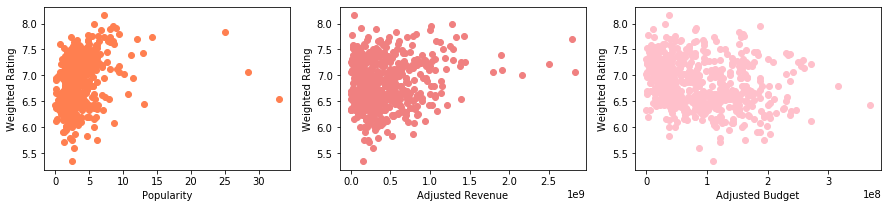

In [202]:
# Now, let's examine the correlations between weighted rating and popularity, revenue, & budget.
plt.figure(figsize=(15, 3))
scatterplot(1, m1['popularity'],m1['weighted_rating'],'coral', "Popularity")  
scatterplot(2, m1['revenue_adj'],m1['weighted_rating'],'lightcoral',"Adjusted Revenue")
scatterplot(3, m1['budget_adj'],m1['weighted_rating'],'pink',"Adjusted Budget")

From the above graphs, we see that there exsts a positive correlation between adjusted revenue & weighted rating, which makes sense because more revenue indicates that people liked the film and were willing to pay for it. There also seems to be a positive correlation between weighted rating and popularity, however the correlation is not as strong. To be able to infer more from this, we would need to know how exactly was the popularity score calculated.   
Surprisingly, there seems to exist a negative correlation between adjusted budget and weighted rating. Further tests are needed to validate its significance, but if the correlation is statistically significant, movie directors should probably think more about the plot then spend more money when they are producing a movie.

Just out of curiosity, I would also like to see whether movies released in different years tend to have different ratings.

**First, let's create a pie chart to visualize how many movies were produced in each year:`**

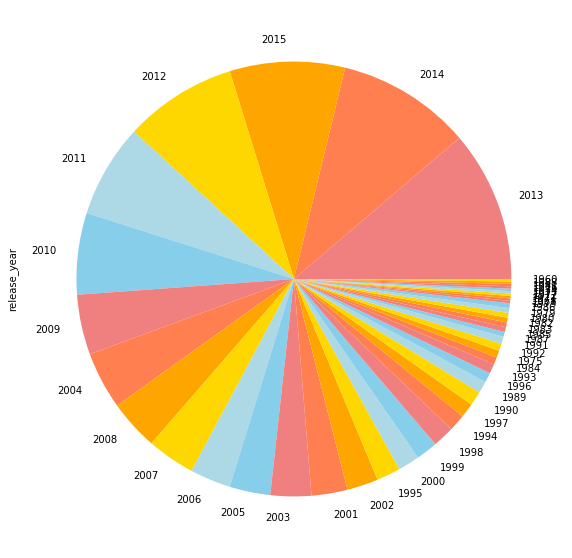

In [251]:
m1['release_year'].value_counts().plot(kind='pie', figsize=(10,10), 
                                       colors=["lightcoral","coral","orange",
                                              "gold","lightblue","skyblue"]);

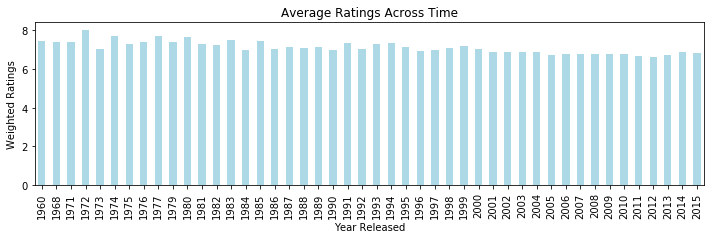

In [223]:
#We see that most movies in our dataset are produced within the last 2 decades.
#Now let's visualize the average ratings of all movies produced in each year.
m1_grouped=m1.groupby('release_year').mean()
m1_grouped=m1_grouped['weighted_rating']
m1_grouped.plot(kind='bar', figsize=(12,3), color='lightblue', title='Average Ratings Across Time')
plt.xlabel("Year Released");
plt.ylabel("Weighted Ratings");

We see that the trend seems flat, so people's relative taste has stayed relatively stable over time.

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Does quantity lead to quality?

My hypothesis was that the total number of movies that a director has directed and the mean ratings that he/she receives for all of his/her movies should be positively correlated. According to our the scatter plot, there does seem to be a positive correlation. Whether this correlation is statistically significant should be further evaluated in future analysis.

### Research Question 2: Popularity, Revenue, Budget and their correlations with Weighted Ratings

My hypothesis was that these three variables should all positively correlate with weighted ratings. To my surprise, while popularity and adjusted revenue do seem to positively corerlate with ratings, the correlations do not look that strong, and adjusted budget seems to negatively correlates with ratings. 

So maybe more money-spending doesn't guarantee a better movie? But before we draw any certain conclusions, we need more information on how were the adjusted budget/revenue as well as the popularity index calculated in the first place.  

Just out of curiosity, I also plotted a barchart that shows the average ratings of all movies released in one year since 1960. The barchart looks rather flat, which shows that people's 'pickiness' seem to stay relatively constant.

### Limitations and Areas for further analysis

One limitation is that we did not perform statistical tests on the dataset, so we were not able to establish statistically significant inference. We would also want to look into the directionality of our correlation. Take the number of director's movies & average rating as an example, it could be that because a director has produced a lot of movies, hence his movies naturally get more attention/higher ratings due to audience' biases. Or it could that the director is so good so he has more funds/resources to produce more movies. Either way, we will see a positive correlation between these two variables, so we would need to perform furter tests to validate the directionality.    

The other limitation is that we don't know how some of the pre-existing data, such as popularity, or adjusted revenue/budget are calculated in the first place. To be able to really connect our analysis with real world impacts, we would need to know more details on the calculation procedure.  

Lastly, we dropped all rows with null values, which may itself be biased because smaller movies with less famous cast might not have a website or a revenue column filled. 

To be able to establish a statistically significant rating prediction system, we can ran liner regressions in the future to quantify the influence that different variables has on the average rating of a movie.   
Furthermore, some variables that were not explored in this research include: genres, movie plots, taglines, etc. To be able to analyze how a movie's plot influences a movie's rating, NLP techniques can be used in the future to explore the data set.  